# Weston _ EDA _ MODELING

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#Random State seed
SEED = 4162734

In [2]:
tweet_df = pd.read_csv('data/db_tweet_emotion.csv', encoding= 'unicode_escape')

In [3]:
tweet_df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [4]:
tweet_df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [5]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [6]:
tweet_df['emotion_in_tweet_is_directed_at'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [7]:
tweet_df = tweet_df.rename(columns={
    'emotion_in_tweet_is_directed_at': 'directed_at', 'is_there_an_emotion_directed_at_a_brand_or_product': 'emotion'})



In [8]:
tweet_df

,tweet_text,directed_at,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [9]:
tweet_df['brand'] = tweet_df['directed_at']

tweet_df['brand'] = tweet_df['brand'].replace('iPad', 'Apple')
tweet_df['brand'] = tweet_df['brand'].replace('iPad or iPhone App', 'Apple')
tweet_df['brand'] = tweet_df['brand'].replace('iPhone', 'Apple')
tweet_df['brand'] = tweet_df['brand'].replace('Other Apple product or service', 'Apple')

tweet_df['brand'] = tweet_df['brand'].replace('Other Google product or service', 'Google')
tweet_df['brand'] = tweet_df['brand'].replace('Android App', 'Google')
tweet_df['brand'] = tweet_df['brand'].replace('Android', 'Google')



In [10]:
tweet_df['directed_at'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: directed_at, dtype: int64

In [11]:
tweet_df['brand'].value_counts()

Apple     2409
Google     882
Name: brand, dtype: int64

### TextBlob

In [12]:
from textblob import TextBlob, Word, Blobber

In [13]:
tweet_df['tweet_text'] = tweet_df['tweet_text'].map(str)

In [14]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [15]:
tweet_df['TextBlob_Polarity'] = tweet_df['tweet_text'].apply(getPolarity)

In [16]:
tweet_df

,tweet_text,directed_at,emotion,brand,TextBlob_Polarity
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,Apple,-0.250000
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,Apple,0.466667
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,Apple,-0.155556
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Apple,0.000000
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,Google,0.800000
...,...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion,Apple,0.000000
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product,NaN,0.000000
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product,NaN,0.000000
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product,NaN,-0.054545


In [17]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'


In [18]:
tweet_df['TextBlob_Analysis'] = tweet_df['TextBlob_Polarity'].apply(getAnalysis)

In [19]:
tweet_df_west = tweet_df.copy()

## PREPROCESSING - EDDIE

In [20]:
tweet_df = pd.read_csv('data/db_tweet_emotion.csv', encoding= 'unicode_escape')

In [21]:
tweet_df.rename(columns={'emotion_in_tweet_is_directed_at': 'directed_at', 
                'is_there_an_emotion_directed_at_a_brand_or_product': 'emotion'}, 
                inplace=True)

In [22]:
tweet = tweet_df['tweet_text']
directed = tweet_df['directed_at']
emotion = tweet_df['emotion']

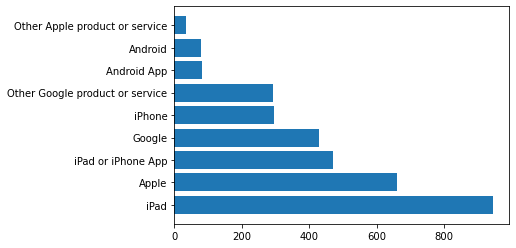

In [23]:
plt.barh(directed.value_counts().index, directed.value_counts().values);


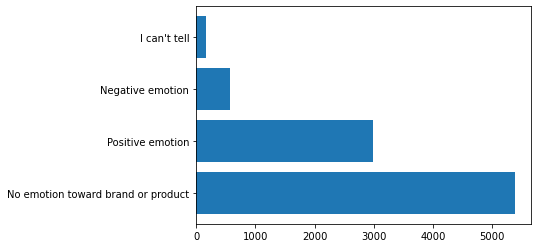

In [24]:
plt.barh(emotion.value_counts().index, emotion.value_counts().values);


#### Functions

In [25]:
# Instantiating tokenizer
tokenizer = RegexpTokenizer(pattern=r"(?u)\b\w\w+\b")

# Create a list of stopwords in English
sw = stopwords.words('english')

# Create an instance of nltk's PorterStemmer with the variable name `stemmer`
stemmer = PorterStemmer()

In [26]:
def tokenize_tweet(text, tokenizer, stopwords_list, stemmer):
        
    # Tokenize using `tokenizer`
    text = tokenizer.tokenize(text)
    
    # Remove stopwords
    text = [token for token in text if token not in stopwords_list]
    
    # Stem the tokenized text
    text = [stemmer.stem(token) for token in text]

    return text

In [27]:
def clean_and_tokenize_tweets(dataframe):
    dataframe.rename(columns={'emotion_in_tweet_is_directed_at': 'directed_at', 
                'is_there_an_emotion_directed_at_a_brand_or_product': 'emotion'}, 
                inplace=True)

    tweet = dataframe['tweet_text']
    directed = dataframe['directed_at']
    emotion = dataframe['emotion']

    # Create a list of what we want to catagorize as either apple or google
    apple_ = ['iPad', 'Apple', 'iPad or iPhone App', 'iPhone', 'Other Apple product or service']
    google_ = ['Google', 'Other Google product or service', 'Android App', 'Google', 'Android']

    # Then call mask to establish the apple_ list of phrases into the Apple label.
    # Next, call mask on the newly created feature named 'brand' to replace
    # the Google related strings to 'Google'
    dataframe['brand'] = directed.mask(directed.isin(apple_), 'Apple')
    dataframe['brand'] = dataframe['brand'].mask(directed.isin(google_), 'Google')

    list_emotions = list(emotion.value_counts().index)

    dataframe['emotion_num'] = emotion.replace(list_emotions, [0,1,-1,0])

    dataframe.dropna(subset=['tweet_text'], inplace=True)

    dataframe['tweet_text'] = tweet.str.lower()

    apple_keywords = ['ipad', 'iphone', 'apple', 'itunes', 'sxsw']
    google_keywords = ['google', 'android']

    dataframe.reset_index(drop=True, inplace=True)


    for idx, text in enumerate(dataframe['tweet_text']):
        if any(word in  text for word in apple_keywords):
            dataframe['brand'].iloc[idx] = 'Apple'
        elif any(word in  text for word in google_keywords):
            dataframe['brand'].iloc[idx] = 'Google'


    dataframe.dropna(subset=['brand'], inplace=True)
    tweet_df.drop(index=tweet_df.index[-1], inplace=True)

    dataframe.reset_index(drop=True, inplace=True)

    tweet_df['tweet_text_tokenized'] = tweet_df['tweet_text'].apply(lambda x: tokenize_tweet(x, tokenizer, sw, stemmer))

    return dataframe

In [28]:
tweet_df = pd.read_csv('data/db_tweet_emotion.csv', encoding= 'unicode_escape')

In [29]:
clean_and_tokenized = clean_and_tokenize_tweets(tweet_df)

/Users/westonshuken/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [30]:
clean_and_tokenized

,tweet_text,directed_at,emotion,brand,emotion_num,tweet_text_tokenized
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,Negative emotion,Apple,-1,"[wesley83, 3g, iphon, hr, tweet, rise_austin, ..."
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,Positive emotion,Apple,1,"[jessede, know, fludapp, awesom, ipad, iphon, ..."
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,Positive emotion,Apple,1,"[swonderlin, wait, ipad, also, sale, sxsw]"
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Apple,-1,"[sxsw, hope, year, festiv, crashi, year, iphon..."
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,Positive emotion,Apple,1,"[sxtxstate, great, stuff, fri, sxsw, marissa, ..."
...,...,...,...,...,...,...
9084,"@mention yup, but i don't have a third app yet...",NaN,No emotion toward brand or product,Apple,0,"[mention, yup, third, app, yet, android, sugge..."
9085,ipad everywhere. #sxsw {link},iPad,Positive emotion,Apple,1,"[ipad, everywher, sxsw, link]"
9086,"wave, buzz... rt @mention we interrupt your re...",NaN,No emotion toward brand or product,Apple,0,"[wave, buzz, rt, mention, interrupt, regularli..."
9087,"google's zeiger, a physician never reported po...",NaN,No emotion toward brand or product,Apple,0,"[googl, zeiger, physician, never, report, pote..."


## PREPROCESSING - WESTON

### Remove last tweet

In [31]:
tweet_df_west.loc[9092, 'tweet_text']

'\x8cÏ¡\x8eÏà\x8aü_\x8b\x81Ê\x8b\x81Î\x8b\x81Ò\x8b\x81£\x8b\x81Á\x8bââ\x8b\x81_\x8b\x81£\x8b\x81\x8f\x8bâ_\x8bÛâRT @mention Google Tests \x89ÛÏCheck-in Offers\x89Û\x9d At #SXSW {link}'

In [32]:
tweet_df_west = tweet_df_west[:-1]

### Lowercase

In [33]:
def lower(corpus, column):
    corpus[column] = corpus[column].str.lower()

    return corpus

In [34]:
df_clean = lower(tweet_df_west, 'tweet_text')

### Tokeninze

In [35]:
from nltk.tokenize import RegexpTokenizer

In [36]:
def token(corpus, column, regex=r"(?u)\b\w\w+\b"):
    token_pattern = regex

    tokenizer = RegexpTokenizer(token_pattern)
    corpus[column + '_token'] = corpus[column].apply(tokenizer.tokenize)
    
    return corpus

In [37]:
df_clean = token(tweet_df_west, 'tweet_text')

###  Binary Classifier 
(1 = not negative, 0 = negative)

In [38]:
df_clean['emotion_bin'] = df_clean['emotion'].map(lambda x: 0 if x == 'Negative emotion' else 1)

### Multiclass  Classifier 
(-1 = negative, 0 = neutral, 1 = positive)

In [39]:
list_emotions = list(df_clean['emotion'].value_counts().index)
df_clean['emotion_multi'] = df_clean['emotion'].replace(list_emotions, [0,1,-1,0])

In [40]:
df_clean

,tweet_text,directed_at,emotion,brand,TextBlob_Polarity,TextBlob_Analysis,tweet_text_token,emotion_bin,emotion_multi
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,Negative emotion,Apple,-0.250000,Negative,"[wesley83, have, 3g, iphone, after, hrs, tweet...",0,-1
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,Positive emotion,Apple,0.466667,Positive,"[jessedee, know, about, fludapp, awesome, ipad...",1,1
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,Positive emotion,Apple,-0.155556,Negative,"[swonderlin, can, not, wait, for, ipad, also, ...",1,1
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Apple,0.000000,Neutral,"[sxsw, hope, this, year, festival, isn, as, cr...",0,-1
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,Positive emotion,Google,0.800000,Positive,"[sxtxstate, great, stuff, on, fri, sxsw, maris...",1,1
...,...,...,...,...,...,...,...,...,...
9087,"@mention yup, but i don't have a third app yet...",NaN,No emotion toward brand or product,NaN,0.000000,Neutral,"[mention, yup, but, don, have, third, app, yet...",1,0
9088,ipad everywhere. #sxsw {link},iPad,Positive emotion,Apple,0.000000,Neutral,"[ipad, everywhere, sxsw, link]",1,1
9089,"wave, buzz... rt @mention we interrupt your re...",NaN,No emotion toward brand or product,NaN,0.000000,Neutral,"[wave, buzz, rt, mention, we, interrupt, your,...",1,0
9090,"google's zeiger, a physician never reported po...",NaN,No emotion toward brand or product,NaN,0.000000,Neutral,"[google, zeiger, physician, never, reported, p...",1,0


### Lemmatizer

In [41]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in text]

df_clean['tweet_text_token'] = df_clean['tweet_text_token'].apply(lemmatize_text)

### FreqDist

In [42]:
from nltk import FreqDist

In [43]:
frequency_dist_all = FreqDist(clean_and_tokenized["tweet_text_tokenized"].explode())

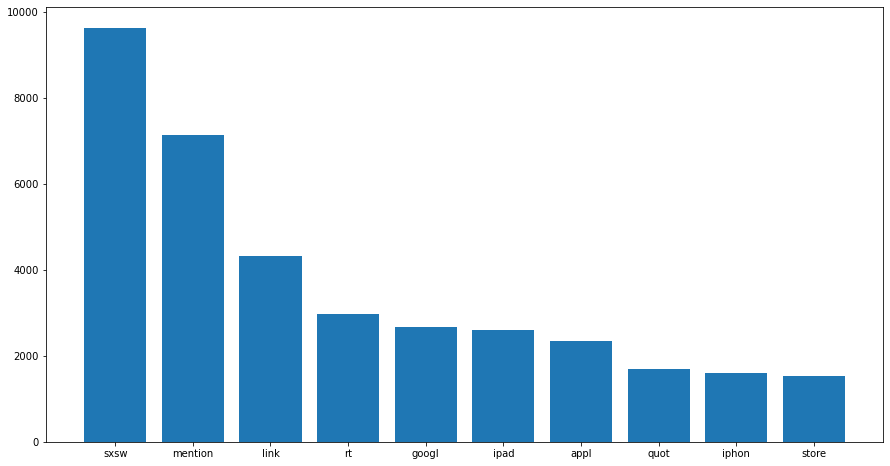

In [44]:
top_ten = list(zip(*frequency_dist_all.most_common(10)))
tokens = top_ten[0]
counts = top_ten[1]

plt.figure(figsize=(15, 8))
plt.bar(tokens, counts);

### MODELING

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

In [46]:
base_models = {'LogisticRegression':
                {'classifier': LogisticRegression(max_iter=1000, random_state=SEED)},
               
               'MultinomialNB':
                  {'classifier': MultinomialNB()},
     
               'RandomForest':
                  {'classifier': RandomForestClassifier(random_state=SEED)},
              }

In [47]:
# Create a function to iterate through dict of models
def run_model(models, type_, X, y):
    """
    """
    X = [' '.join(tweet) for tweet in X]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED) #Splitting the data to predictors/target & test/train
    
    metric_table = pd.DataFrame(columns=['Model', 'CV Score', 'Accuracy', 'Type']) # Creating empty table for model scoring
    # Vecorizer
    cvec = CountVectorizer(stop_words={'english'}, min_df=2)

    cvec.fit(X_train)
        
    X_train_cvec = cvec.transform(X_train)
    X_test_cvec = cvec.transform(X_test)
    
    # Iterating through model dictionary
    for name, model in models.items():
        print(f'Running... {name} Model:')
        
            
        model['classifier'].fit(X_train_cvec, y_train)
        y_pred = model['classifier'].predict(X_test_cvec)
        y_score = model['classifier'].predict_proba(X_test_cvec)[:,1] 
            
        cv_score = cross_val_score(model['classifier'], X_train_cvec, y_train, cv=3)
        cv_score_mean = round(np.mean(cv_score), 4)
            

#         Scoring
        accuracy = accuracy_score(y_test, y_pred)
        
#         Appending Scores to metric table
        metric_table = metric_table.append({'Model': name, 'CV Score': cv_score_mean, 'Accuracy': round(accuracy, 4),
                                           'Type': type_}, ignore_index=True)
        
        print(f'Cross Validation Score: {cv_score}')
        print(f'Test Accuracy Score: {accuracy}\n')
    

    return metric_table

In [48]:
baseline_results = run_model(base_models, 'baseline_weston', df_clean.tweet_text_token, df_clean.emotion_bin)
baseline_results

Running... LogisticRegression Model:
Cross Validation Score: [0.9441267  0.93928729 0.93400792]
Test Accuracy Score: 0.9362076550813903

Running... MultinomialNB Model:
Cross Validation Score: [0.91684998 0.91904971 0.92036956]
Test Accuracy Score: 0.9278486581610207

Running... RandomForest Model:
Cross Validation Score: [0.94456665 0.9441267  0.93972723]
Test Accuracy Score: 0.943246810382754



,Model,CV Score,Accuracy,Type
0,LogisticRegression,0.9391,0.9362,baseline_weston
1,MultinomialNB,0.9188,0.9278,baseline_weston
2,RandomForest,0.9428,0.9432,baseline_weston


In [49]:
results = run_model(base_models, 'baseline_eddie', clean_and_tokenized['tweet_text_tokenized'], clean_and_tokenized.emotion_num)
results

Running... LogisticRegression Model:
Cross Validation Score: [0.69014085 0.68177817 0.67341549]
Test Accuracy Score: 0.6885173779146503

Running... MultinomialNB Model:
Cross Validation Score: [0.6659331  0.64304577 0.6681338 ]
Test Accuracy Score: 0.6577210734711835

Running... RandomForest Model:
Cross Validation Score: [0.68397887 0.6875     0.68089789]
Test Accuracy Score: 0.6863176418829741



,Model,CV Score,Accuracy,Type
0,LogisticRegression,0.6818,0.6885,baseline_eddie
1,MultinomialNB,0.6590,0.6577,baseline_eddie
2,RandomForest,0.6841,0.6863,baseline_eddie


In [50]:
tuned_models = {'LogisticRegression':
                {'classifier': LogisticRegression(max_iter=100, C=.01, n_jobs=100, random_state=SEED)},
               
               'MultinomialNB':
                  {'classifier': MultinomialNB()},
     
               'RandomForest':
                  {'classifier': RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=SEED)},
              }

In [51]:
hypter_tuned_results = run_model(tuned_models, 'tuned_weston', df_clean.tweet_text_token, df_clean.emotion_bin)
hypter_tuned_results

Running... LogisticRegression Model:
Cross Validation Score: [0.9375275  0.93708755 0.93708755]
Test Accuracy Score: 0.9375274967003959

Running... MultinomialNB Model:
Cross Validation Score: [0.91684998 0.91904971 0.92036956]
Test Accuracy Score: 0.9278486581610207

Running... RandomForest Model:
Cross Validation Score: [0.9375275  0.9375275  0.93708755]
Test Accuracy Score: 0.9375274967003959



,Model,CV Score,Accuracy,Type
0,LogisticRegression,0.9372,0.9375,tuned_weston
1,MultinomialNB,0.9188,0.9278,tuned_weston
2,RandomForest,0.9374,0.9375,tuned_weston


In [52]:
metric_table = pd.concat([baseline_results, results, hypter_tuned_results], ignore_index=True)
metric_table['Name'] = metric_table['Model'] + ' ' + metric_table['Type']
metric_table


,Model,CV Score,Accuracy,Type,Name
0,LogisticRegression,0.9391,0.9362,baseline_weston,LogisticRegression baseline_weston
1,MultinomialNB,0.9188,0.9278,baseline_weston,MultinomialNB baseline_weston
2,RandomForest,0.9428,0.9432,baseline_weston,RandomForest baseline_weston
3,LogisticRegression,0.6818,0.6885,baseline_eddie,LogisticRegression baseline_eddie
4,MultinomialNB,0.6590,0.6577,baseline_eddie,MultinomialNB baseline_eddie
5,RandomForest,0.6841,0.6863,baseline_eddie,RandomForest baseline_eddie
6,LogisticRegression,0.9372,0.9375,tuned_weston,LogisticRegression tuned_weston
7,MultinomialNB,0.9188,0.9278,tuned_weston,MultinomialNB tuned_weston
8,RandomForest,0.9374,0.9375,tuned_weston,RandomForest tuned_weston


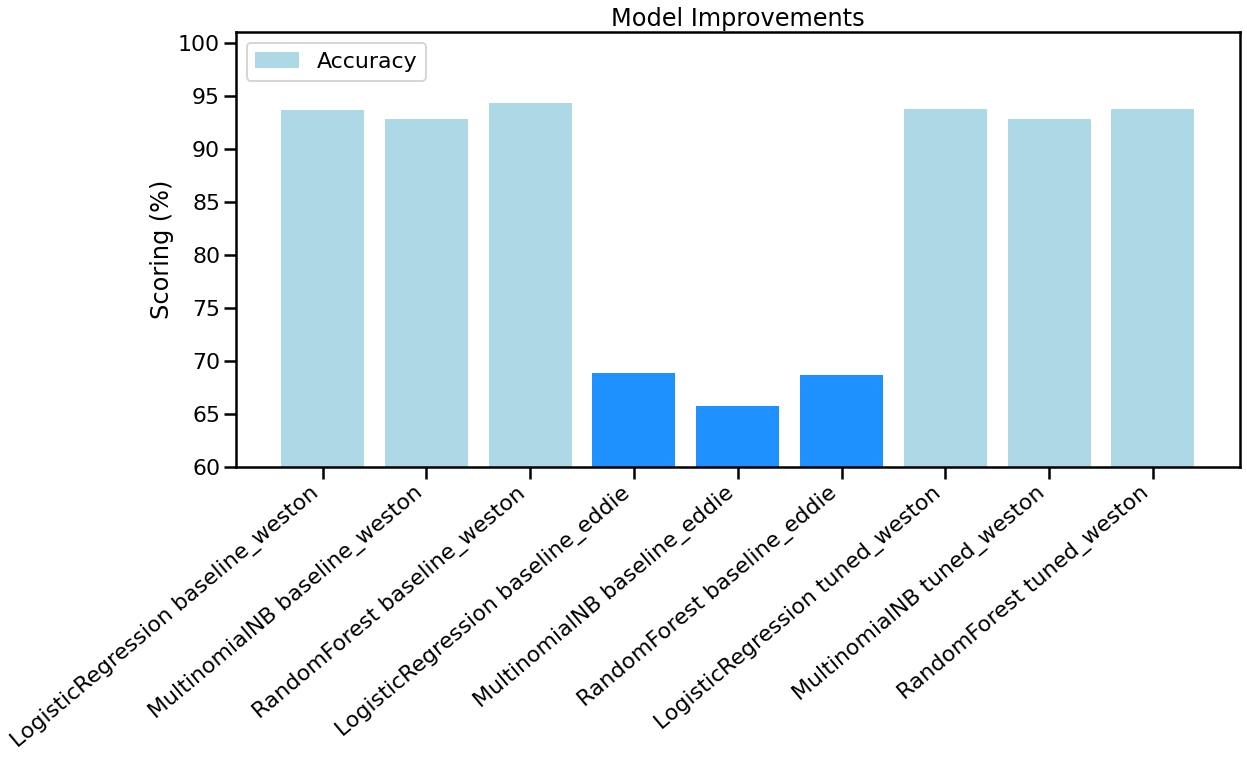

In [54]:
# Plot the Precision and Accuracy metrics of all models
fig, ax = plt.subplots(figsize=(18, 8))
sns.set_context('poster')

c = ['lightblue', 'lightblue', 'lightblue', 'dodgerblue', 'dodgerblue', 'dodgerblue']

# plt.plot(metric_table['Name'], (metric_table['Precision'])*100, color='blue', label='Precision')
plt.bar(metric_table['Name'], (metric_table['Accuracy'])*100, color=c, label='Accuracy')

plt.ylim(60, 101)
plt.grid(False)
plt.xticks(rotation=40, ha='right')
plt.ylabel('Scoring (%)')
plt.title('Model Improvements')
plt.legend(loc="upper left")
plt.show();

### Binary

In [ ]:
# X = df_clean.tweet_text
# y = df_clean.emotion_bin

# X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# cvec = CountVectorizer(stop_words={'english'}, min_df=2)

In [ ]:
# cvec.fit(X_train)

In [ ]:
# X_train_cvec = cvec.transform(X_train)
# X_test_cvec = cvec.transform(X_test)

# X_train_cvec = pd.DataFrame.sparse.from_spmatrix(X_train_cvec)
# X_test_cvec = pd.DataFrame.sparse.from_spmatrix(X_test_cvec)

In [ ]:
# rfc = RandomForestClassifier().fit(X_train_cvec, y_train)

In [ ]:
# rfc.score(X_train_cvec, y_train)

In [ ]:
# rfc.score(X_test_cvec, y_test)

In [ ]:
# from sklearn.metrics import plot_confusion_matrix

In [ ]:
# fig, ax = plt.subplots(figsize=(6, 6))

# plot_confusion_matrix(rfc, X_test_cvec, y_test, ax=ax, display_labels=['negative', 'not negative']);

In [ ]:
# df_clean['emotion_bin'].value_counts(normalize=True)

### MultiClass

In [ ]:
# X = df_clean.tweet_text
# y = df_clean.emotion_multi

# X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# cvec = CountVectorizer()

In [ ]:
# cvec.fit(X_train)

In [ ]:
# X_train_cvec = cvec.transform(X_train)
# X_test_cvec = cvec.transform(X_test)

# X_train_cvec = pd.DataFrame.sparse.from_spmatrix(X_train_cvec)
# X_test_cvec = pd.DataFrame.sparse.from_spmatrix(X_test_cvec)

In [ ]:
# rfc = RandomForestClassifier().fit(X_train_cvec, y_train)

In [ ]:
# rfc.score(X_train_cvec, y_train)

In [ ]:
# rfc.score(X_test_cvec, y_test)

In [ ]:
# from sklearn.metrics import plot_confusion_matrix

In [ ]:
# fig, ax = plt.subplots(figsize=(6, 6))

# plot_confusion_matrix(rfc, X_test_cvec, y_test, ax=ax, display_labels=['negative', 'neutral', 'positive']);

In [ ]:
# df_clean['emotion_multi'].value_counts(normalize=True)

In [ ]:

# params = {'n_estimators':[100, 200], 'max_depth':[10, 15, 20]}

# clf = GridSearchCV(
#         rfc, params, scoring='accuracy', verbose=3
#     )
# clf.fit(X_train_cvec, y_train)

In [ ]:
# second_round_params = clf.best_params_

In [ ]:
# clf.score(X_test_cvec, y_test)

In [ ]:
# first_round_params = clf.best_params_

In [ ]:
# baseline_models = {'LogisticRegression':
#                 {'classifier': LogisticRegression(random_state=SEED)},
               
#                'DecisionTree':
#                   {'classifier': MultinomialNB(random_state=SEED)},
     
#                'RandomForest':
#                   {'classifier': RandomForestClassifier(random_state=SEED)},
                   
#                'RandomForest':
#                   {'classifier': RandomForestClassifier(random_state=SEED)},
               
#                'GradientBoost':
#                   {'classifier': GradientBoostingClassifier(random_state=SEED)}
#               }

In [ ]:
# '''

# Intutively, I think we want to append sentiment analysis score from textblob and nltk to see if this helps the model.

# And, I want to make a function for all the preprocessing + a function for modeling. 
# '''

In [ ]:
# pipeline = Pipeline([
#     ('bow',CountVectorizer(analyzer=text_processing)),  # strings to token integer counts
#     ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
#     ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
# ])